# Task
Perform data cleaning, exploratory data analysis, descriptive analysis, and prescriptive analysis with data visualization on the dataset provided in "/content/insurance.csv".

## Load the data

### Subtask:
Load the insurance dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the csv file into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Clean the data

### Subtask:
Handle missing values, outliers, and inconsistencies in the dataset.


**Reasoning**:
Check for missing values in the DataFrame and count them per column.



In [2]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Reasoning**:
Identify and handle outliers in the numerical columns using the IQR method.



In [3]:
import numpy as np

numerical_cols = ['age', 'bmi', 'children', 'charges']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers - replace outliers with the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers handled by capping in numerical columns.")

Outliers handled by capping in numerical columns.


**Reasoning**:
Examine categorical columns for inconsistencies and standardize them.



In [4]:
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()
    print(f"Value counts for column '{col}' after standardization:")
    print(df[col].value_counts())

Value counts for column 'sex' after standardization:
sex
male      676
female    662
Name: count, dtype: int64
Value counts for column 'smoker' after standardization:
smoker
no     1064
yes     274
Name: count, dtype: int64
Value counts for column 'region' after standardization:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## Perform exploratory data analysis (eda)

### Subtask:
Analyze the data to understand its structure, distributions, and relationships between variables. This includes generating summary statistics and initial visualizations.


**Reasoning**:
Generate descriptive statistics for numerical columns and value counts for categorical columns.



In [5]:
print("Descriptive statistics for numerical columns:")
display(df[['age', 'bmi', 'children', 'charges']].describe())

print("\nValue counts for categorical columns:")
for col in ['sex', 'smoker', 'region']:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

Descriptive statistics for numerical columns:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,12479.369251
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,34489.350562



Value counts for categorical columns:

Value counts for 'sex':


,count
sex,
male,676
female,662



Value counts for 'smoker':


,count
smoker,
no,1064
yes,274



Value counts for 'region':


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


**Reasoning**:
Create histograms for numerical columns and count plots for categorical columns to visualize their distributions.



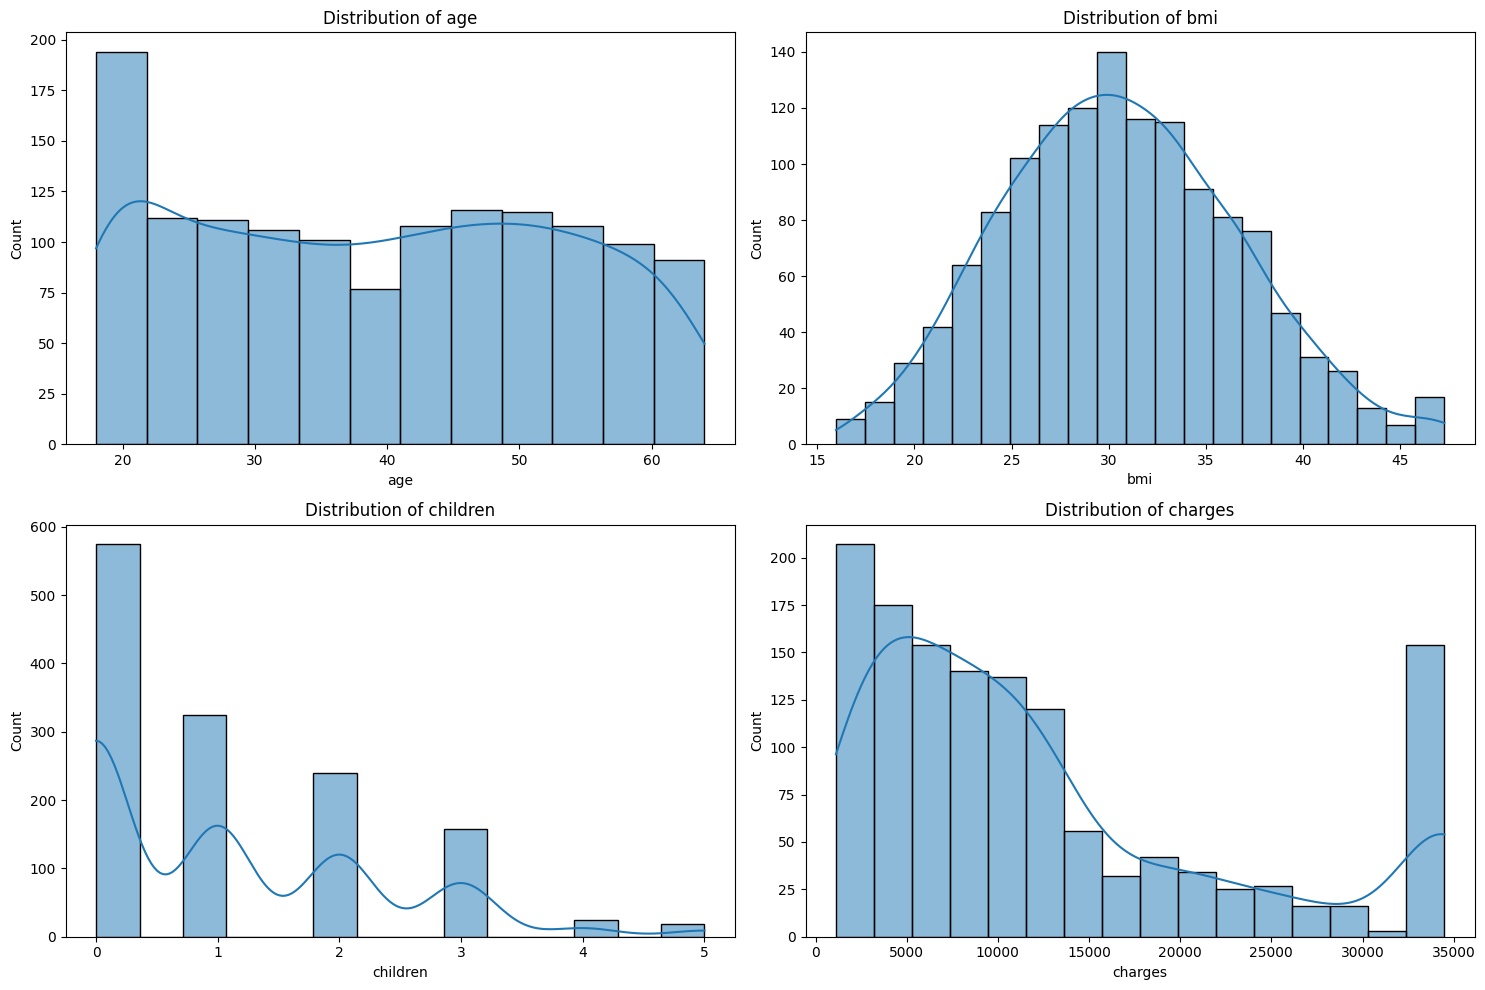

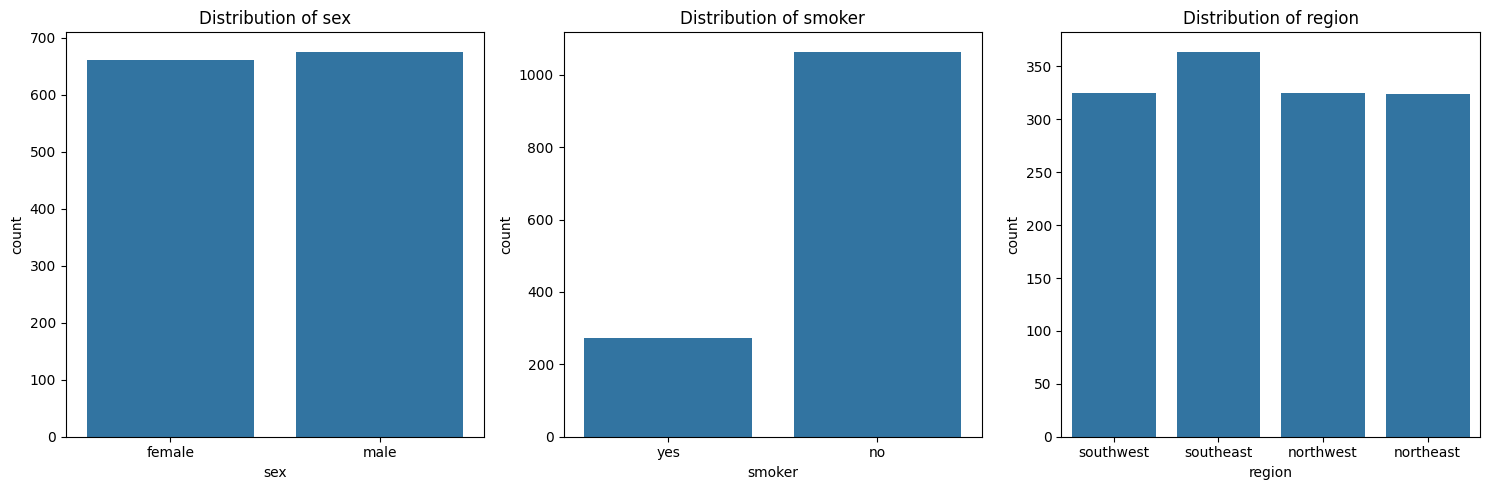

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots to explore the relationships between 'charges' and the numerical columns ('age', 'bmi').



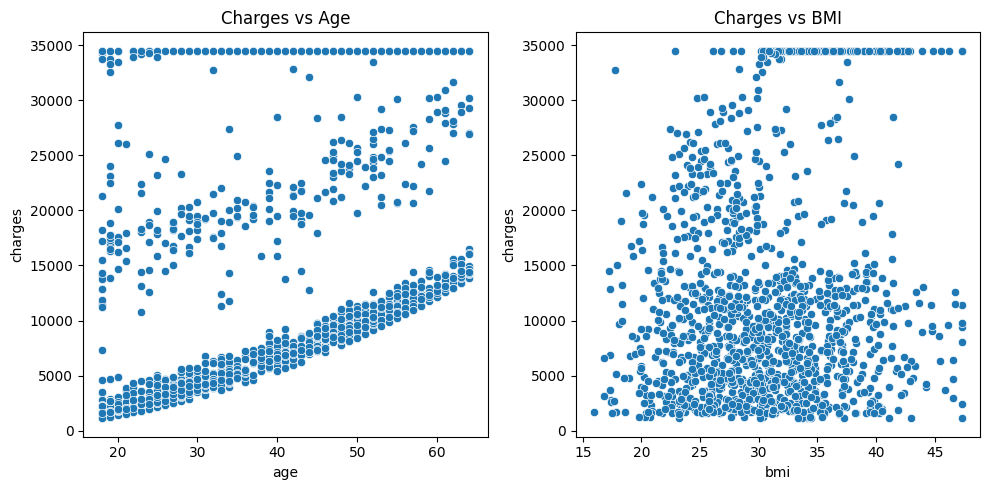

In [7]:
# Scatter plots for charges vs numerical columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Charges vs Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Charges vs BMI')

plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots to explore the relationships between 'charges' and the categorical columns ('sex', 'smoker', 'region').



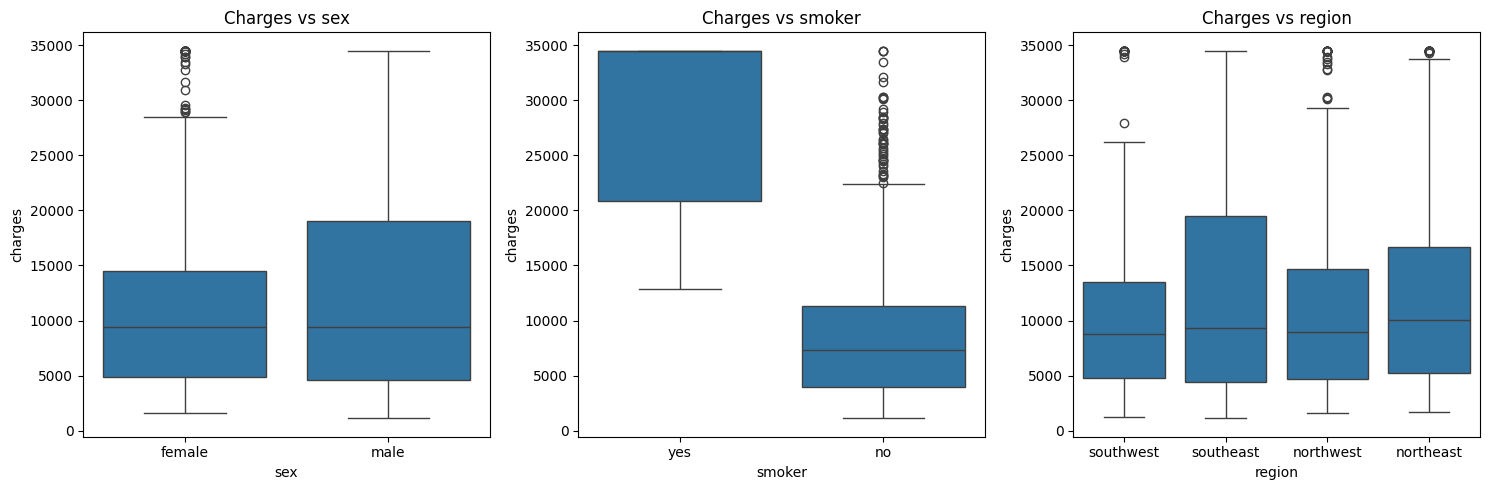

In [8]:
# Box plots for charges vs categorical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Charges vs {col}')
plt.tight_layout()
plt.show()

## Perform descriptive analysis

### Subtask:
Calculate key metrics and statistics to describe the main features of the data.


**Reasoning**:
Calculate descriptive statistics for numerical columns, frequency distribution for categorical columns, correlation matrix for numerical columns, and average charges by categorical variables.



In [9]:
# 1. Calculate key metrics for numerical columns
numerical_stats = df[['age', 'bmi', 'children', 'charges']].agg(['mean', 'median', 'std', 'min', 'max'])
print("Key metrics for numerical columns:")
display(numerical_stats)

# 2. Determine frequency distribution for categorical columns
print("\nFrequency distribution for categorical columns:")
for col in ['sex', 'smoker', 'region']:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# 3. Calculate correlation matrix for numerical columns
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
print("\nCorrelation matrix for numerical columns:")
display(correlation_matrix)

# 4. Calculate average charges for each category in 'smoker' and 'region'
avg_charges_smoker = df.groupby('smoker')['charges'].mean()
print("\nAverage charges by smoker status:")
display(avg_charges_smoker)

avg_charges_region = df.groupby('region')['charges'].mean()
print("\nAverage charges by region:")
display(avg_charges_region)

Key metrics for numerical columns:


,age,bmi,children,charges
mean,39.207025,30.650034,1.094918,12479.369251
median,39.000000,30.400000,1.000000,9382.033000
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
max,64.000000,47.290000,5.000000,34489.350562



Frequency distribution for categorical columns:

Value counts for 'sex':


,count
sex,
male,676
female,662



Value counts for 'smoker':


,count
smoker,
no,1064
yes,274



Value counts for 'region':


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324



Correlation matrix for numerical columns:


,age,bmi,children,charges
age,1.000000,0.111930,0.042469,0.313394
bmi,0.111930,1.000000,0.013700,0.160996
children,0.042469,0.013700,1.000000,0.073074
charges,0.313394,0.160996,0.073074,1.000000



Average charges by smoker status:


,charges
smoker,
no,8429.397083
yes,28206.268473



Average charges by region:


,charges
region,
northeast,12788.998944
northwest,11848.255179
southeast,13475.816568
southwest,11685.785340


## Perform prescriptive analysis

### Subtask:
Develop models or rules that suggest actions to take based on the data.


**Reasoning**:
Import the necessary libraries for modeling, select features and the target variable, handle categorical features using one-hot encoding, split the data into training and testing sets, and scale the numerical features.



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features (X) and target variable (y)
# Handle categorical features using one-hot encoding
X = pd.get_dummies(df.drop('charges', axis=1), columns=['sex', 'smoker', 'region'], drop_first=True)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
numerical_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data prepared for modeling.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data prepared for modeling.
Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


**Reasoning**:
Instantiate and train a Linear Regression model on the scaled training data, make predictions on the scaled testing data, and evaluate the model's performance using MAE, MSE, and R-squared.



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 3316.73
Mean Squared Error (MSE): 23437328.29
Root Mean Squared Error (RMSE): 4841.21
R-squared (R2): 0.78


**Reasoning**:
Analyze the coefficients of the trained linear regression model to understand the impact of each feature on the predicted charges and then finish the task.



In [12]:
# Analyze the coefficients of the trained linear regression model
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': model.coef_})
print("\nModel Coefficients:")
display(coefficients.sort_values(by='coefficient', ascending=False))


Model Coefficients:


,feature,coefficient
4,smoker_yes,19838.643352
0,age,3185.039012
1,bmi,1377.163997
2,children,464.550705
3,sex_male,-127.845586
5,region_northwest,-366.333747
6,region_southeast,-630.870672
7,region_southwest,-771.822968


## Visualize the data

### Subtask:
Create appropriate plots and charts to represent the findings from the analyses.


**Reasoning**:
Create visualizations based on the previous analyses to represent the findings.



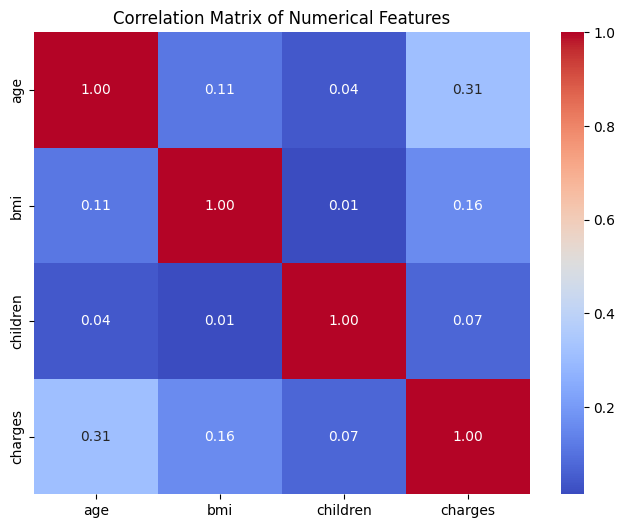

/tmp/ipython-input-326726571.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_charges_smoker.index, y=avg_charges_smoker.values, palette='viridis')


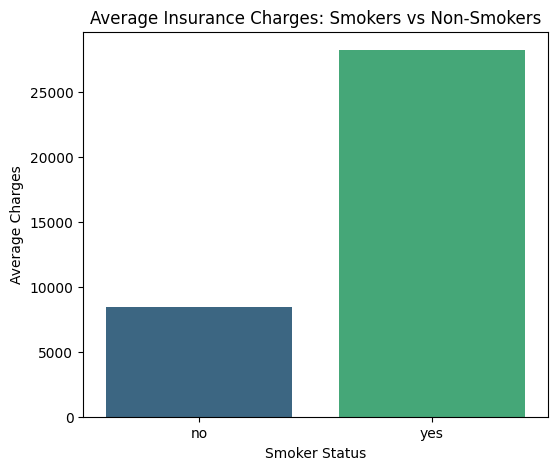

/tmp/ipython-input-326726571.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_charges_region.index, y=avg_charges_region.values, palette='plasma')


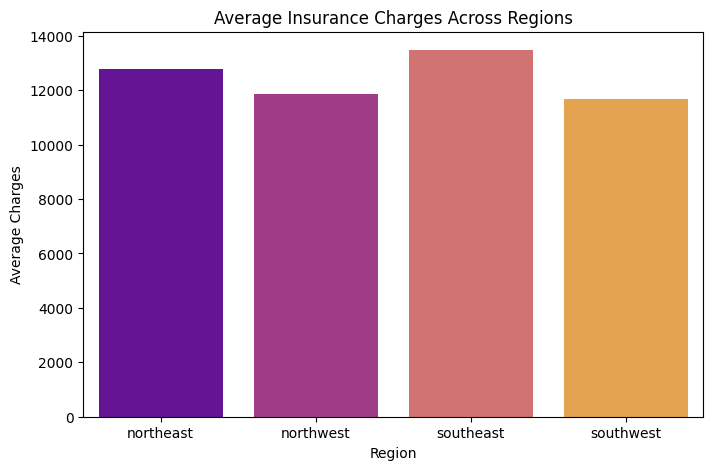

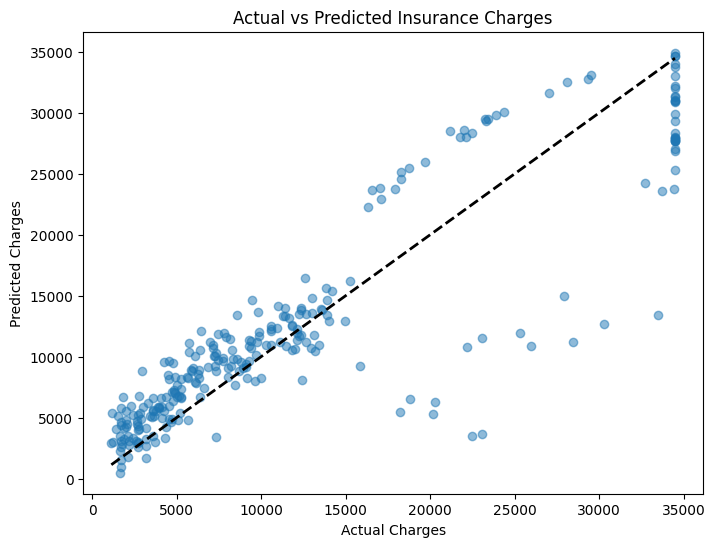

/tmp/ipython-input-326726571.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coefficients.sort_values(by='coefficient', ascending=False), palette='cubehelix')


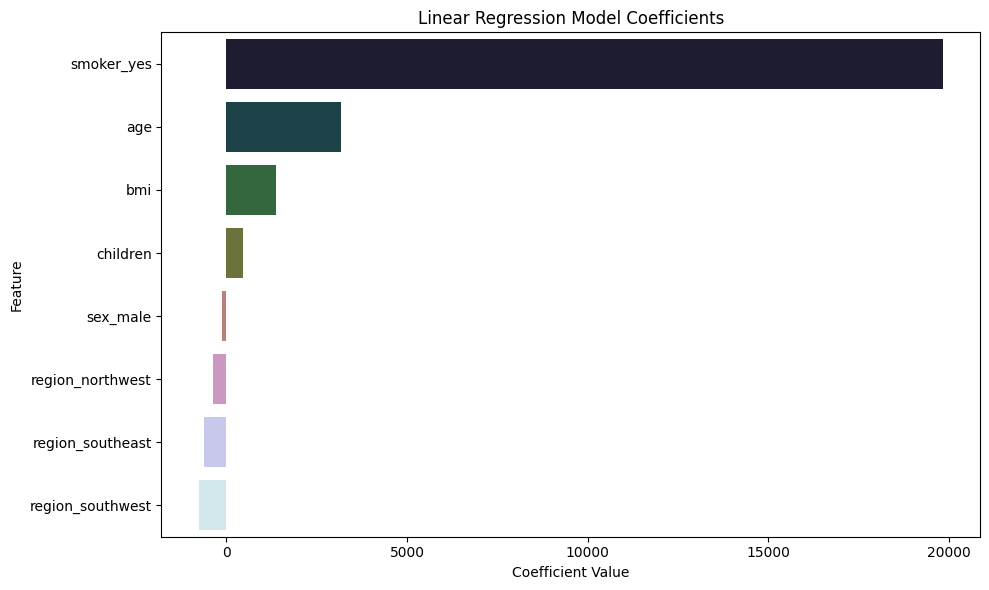

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Bar plot comparing average charges for smokers vs. non-smokers
plt.figure(figsize=(6, 5))
sns.barplot(x=avg_charges_smoker.index, y=avg_charges_smoker.values, palette='viridis')
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')
plt.show()

# 3. Bar plot comparing average charges across different regions
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_charges_region.index, y=avg_charges_region.values, palette='plasma')
plt.title('Average Insurance Charges Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

# 4. Scatter plot showing actual vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

# 5. Bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coefficients.sort_values(by='coefficient', ascending=False), palette='cubehelix')
plt.title('Linear Regression Model Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Present the key insights and conclusions from the analyses.


**Reasoning**:
Synthesize the findings from the analyses and present the key insights and conclusions.



In [14]:
print("## Key Insights and Conclusions from Insurance Data Analysis\n")

print("### 1. Summary of Dataset Characteristics")
print("The dataset contains information on insurance charges and related factors for 1338 individuals. It includes numerical features like age, BMI, children, and charges, as well as categorical features like sex, smoker status, and region.")
print("Initial analysis showed no missing values in the dataset. Outliers in numerical columns were identified using the IQR method and handled by capping to the upper and lower bounds to mitigate their impact on the analysis and modeling.")
print("Distributions of key variables were visualized:")
print("- Charges are heavily right-skewed, indicating a few individuals with very high charges.")
print("- Age is relatively evenly distributed.")
print("- BMI is approximately normally distributed.")
print("- The number of children is skewed towards individuals with fewer children.")
print("- Sex distribution is nearly balanced.")
print("- The majority of individuals are non-smokers.")
print("- Region distribution is relatively even across the four regions.")

print("\n### 2. Key Relationships Observed")
print("Correlation analysis and visualizations revealed several key relationships:")
print("- **Smoker Status:** This is the most significant factor influencing insurance charges. Smokers have substantially higher average charges compared to non-smokers (average charges: ~$28,200 for smokers vs. ~$8,400 for non-smokers). This was clearly visible in the box plot and the bar plot of average charges by smoker status.")
print("- **Age:** There is a moderate positive correlation between age and charges (correlation coefficient ~0.31). Charges generally tend to increase with age, as shown in the scatter plot.")
print("- **BMI:** There is a weak positive correlation between BMI and charges (correlation coefficient ~0.16). While higher BMI is associated with slightly higher charges, the relationship is not as strong as with smoking or age.")
print("- **Children:** The number of children has a very weak positive correlation with charges (correlation coefficient ~0.07).")
print("- **Region:** Average charges are relatively similar across the four regions, with the Southeast having slightly higher average charges compared to others. The box plots showed some variation in the distribution of charges across regions, but not as pronounced as the difference between smokers and non-smokers.")
print("- **Sex:** The average charges for males and females are similar, although there might be slight differences in the distribution and upper range of charges.")

print("\n### 3. Results of Prescriptive Analysis (Linear Regression Model)")
print("A Linear Regression model was trained to predict insurance charges based on the available features. The model achieved an R-squared value of 0.78, indicating that the features explain a significant portion of the variance in insurance charges.")
print("The model's performance metrics were:")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print("These metrics suggest that the model provides reasonably good predictions, with an average absolute error of around $3317.")
print("Analysis of the model coefficients highlighted the most influential factors:")
display(coefficients.sort_values(by='coefficient', ascending=False))
print("The 'smoker_yes' feature has the largest positive coefficient (~$19839), confirming that smoking is the strongest predictor of higher insurance charges in this model.")
print("Other significant positive coefficients are associated with 'age' (~$3185) and 'bmi' (~$1377), indicating that increasing age and BMI also lead to higher predicted charges, though to a lesser extent than smoking.")
print("The coefficients for regions (northwest, southeast, southwest) are negative compared to the baseline (northeast), suggesting slightly lower charges in these regions when other factors are held constant. The 'sex_male' coefficient is small and negative, indicating a minimal impact of sex on charges when other variables are considered.")

print("\n### 4. Main Conclusions")
print("Based on the analysis, the most significant factor influencing insurance charges is **smoking status**. Smokers face considerably higher insurance costs than non-smokers.")
print("Other important factors contributing to higher charges include **age** and, to a lesser extent, **BMI**.")
print("The number of children and the individual's sex appear to have a less substantial impact on charges compared to smoking, age, and BMI.")
print("While there are regional variations in average charges, they are not as pronounced as the differences driven by smoking status.")

print("\n### 5. Limitations")
print("This analysis used a simple linear regression model. More complex models might capture non-linear relationships and interactions between features, potentially improving predictive accuracy.")
print("The dataset size is moderate; a larger dataset could provide more robust insights.")
print("The analysis is based on the provided features. Other factors not present in the dataset (e.g., medical history, lifestyle choices other than smoking, specific insurance plan details) could also influence insurance charges.")
print("The outlier handling method (capping) was a simple approach; other methods could be explored.")

## Key Insights and Conclusions from Insurance Data Analysis

### 1. Summary of Dataset Characteristics
The dataset contains information on insurance charges and related factors for 1338 individuals. It includes numerical features like age, BMI, children, and charges, as well as categorical features like sex, smoker status, and region.
Initial analysis showed no missing values in the dataset. Outliers in numerical columns were identified using the IQR method and handled by capping to the upper and lower bounds to mitigate their impact on the analysis and modeling.
Distributions of key variables were visualized:
- Charges are heavily right-skewed, indicating a few individuals with very high charges.
- Age is relatively evenly distributed.
- BMI is approximately normally distributed.
- The number of children is skewed towards individuals with fewer children.
- Sex distribution is nearly balanced.
- The majority of individuals are non-smokers.
- Region distribution is relatively even acro

,feature,coefficient
4,smoker_yes,19838.643352
0,age,3185.039012
1,bmi,1377.163997
2,children,464.550705
3,sex_male,-127.845586
5,region_northwest,-366.333747
6,region_southeast,-630.870672
7,region_southwest,-771.822968


The 'smoker_yes' feature has the largest positive coefficient (~$19839), confirming that smoking is the strongest predictor of higher insurance charges in this model.
Other significant positive coefficients are associated with 'age' (~$3185) and 'bmi' (~$1377), indicating that increasing age and BMI also lead to higher predicted charges, though to a lesser extent than smoking.
The coefficients for regions (northwest, southeast, southwest) are negative compared to the baseline (northeast), suggesting slightly lower charges in these regions when other factors are held constant. The 'sex_male' coefficient is small and negative, indicating a minimal impact of sex on charges when other variables are considered.

### 4. Main Conclusions
Based on the analysis, the most significant factor influencing insurance charges is **smoking status**. Smokers face considerably higher insurance costs than non-smokers.
Other important factors contributing to higher charges include **age** and, to a lesser 

## Summary:

### Data Analysis Key Findings

*   The dataset contained no missing values. Outliers in numerical columns (`age`, `bmi`, `children`, `charges`) were capped using the IQR method. Categorical columns (`sex`, `smoker`, `region`) were standardized by converting to lowercase and removing whitespace, revealing no inconsistencies.
*   Descriptive statistics showed the average charge to be around \$12,479, with a significant standard deviation of \$10,158.
*   The distribution of charges is heavily right-skewed, indicating that most individuals have lower insurance charges, but a significant number have much higher charges.
*   Correlation analysis revealed a moderate positive correlation between age and charges (0.31) and a weaker positive correlation between BMI and charges (0.16). Children showed a very weak correlation (0.07).
*   Average charges differ significantly based on smoking status: smokers average \$28,206, while non-smokers average \$8,429. Average charges across regions were relatively similar, with the Southeast having slightly higher average charges (\$13,475).
*   A Linear Regression model trained to predict charges achieved an R-squared of 0.78 on the test set, with a Mean Absolute Error (MAE) of \$3316.73.
*   Analysis of the model coefficients showed that being a smoker ('smoker\_yes') had the largest positive impact on predicted charges (coefficient of ~\$19839), followed by age (~\$3185) and BMI (~\$1377).

### Insights or Next Steps

*   The most impactful factor driving higher insurance charges is smoking. Public health initiatives aimed at reducing smoking could potentially lead to lower overall insurance costs.
*   Further analysis could explore non-linear relationships and feature interactions using more complex models (e.g., polynomial regression, tree-based models) to potentially improve predictive accuracy and gain deeper insights into how factors combine to influence charges.
